In [291]:
import pandas as pd
from keras.src.metrics import MeanAbsoluteError, MeanSquaredError

df = pd.read_csv('Clean_Dataset.csv')

In [292]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


### Airline

In [293]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

### Source_City


In [294]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

### Destination

In [295]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [296]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [297]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [298]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [299]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [300]:
df['duration'].min()

0.83

In [301]:
df['duration'].max()

49.83

In [302]:
df['duration'].median()

11.25

## Preprocessing

In [303]:
df =  df.drop('Unnamed: 0', axis=1)
df =  df.drop('flight', axis=1)

df['class'] = df['class'].apply(lambda x: 1 if x =='Business' else 0)

In [304]:
df.stops = pd.factorize(df.stops)[0]


In [305]:
df = df.join(pd.get_dummies(df.airline,  prefix='airline')).drop('airline' , axis=1)
df = df.join(pd.get_dummies(df.source_city,  prefix='source')).drop('source_city' , axis=1)
df = df.join(pd.get_dummies(df.destination_city,  prefix='dest')).drop('destination_city' , axis=1)
df = df.join(pd.get_dummies(df.arrival_time,  prefix='arrival')).drop('arrival_time' , axis=1)
df = df.join(pd.get_dummies(df.departure_time,  prefix='departure')).drop('departure_time' , axis=1)


In [306]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
300151,1,1,10.00,49,81585,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


## Training Regression Model


In [307]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

x , y = df.drop('price' , axis=1) , df.price

In [308]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2)


In [309]:
reg = RandomForestRegressor(n_jobs=-1 )

reg.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [310]:
reg.score(x_test, y_test)

0.9853131031999791

In [311]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
import math

In [312]:
y_pred  = reg.predict(x_test)

print('--------------------------')

print(f'R2: {r2_score(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RISE: {math.sqrt(mean_squared_error(y_test, y_pred))}')


--------------------------
R2: 0.9853131031999791
MAE: 1068.6844587387786
MSE: 7552274.576028152
RISE: 2748.140203124315


Text(0.5, 1.0, 'Prediction vs Actual Flight Price')

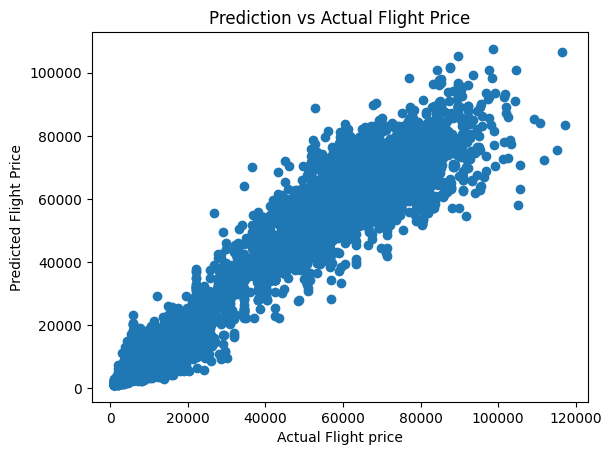

In [313]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction vs Actual Flight Price')

In [314]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [315]:
importances = dict(zip(reg.feature_names_in_ , reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)


In [316]:
df.days_left.describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

<BarContainer object of 10 artists>

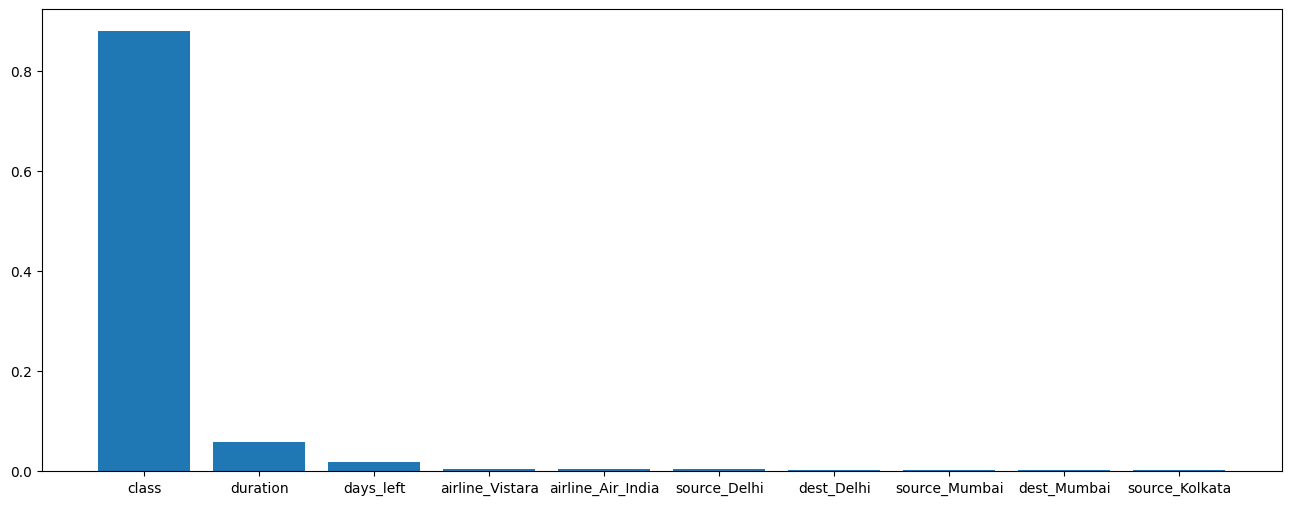

In [317]:
plt.figure(figsize = (16,6))
plt.bar([x[0] for x in sorted_importances[:10]] , [x[1] for x in sorted_importances[:10]])
        

### Hyper Parameter


In [ ]:
from sklearn.model_selection import GridSearchCV
reg = RandomForestRegressor(n_jobs=-1)

param_grid = {
    'n_estimators':[100,200,300],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['auto' , 'sqrt']
}

grid_search = GridSearchCV(reg, param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

In [289]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_grid = {
    'n_estimators': randint(100,300),
    'max_depth':[None,10,20,30,40,50],
    'min_samples_split':randint(2,11),
    'min_samples_leaf':randint(1,5),
    'max_features':[1.0,'auto' , 'sqrt']
}

reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_grid, n_iter=2,cv=3 , scoring='neg_mean_squared_error' , verbose=2 , random_state=10 ,n_jobs=-1)

random_search.fit(x_train, y_train)

best_regressor = random_search.best_estimator_


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=213; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=213; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=213; total time=   0.0s


KeyboardInterrupt: 

In [290]:
best_regressor.score(x_test,y_test)

NameError: name 'best_regressor' is not defined

In [ ]:
y_pred = best_regressor.predict(x_test)

print(f'R2: {r2_score(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RISE: {math.sqrt(mean_squared_error(y_test, y_pred))}')



In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction vs Actual Flight Price')

In [ ]:
best_regressor.predict()